## 가중치 초기화
가중치를 어떻게 초기화 할 것인지는 매우 중요한 문제이다. 예를들어, 과대적합을 억제해 범용 성능을 높이는 테크닉인 가중치 감소(weight decay) 기법 같은 경우도, 가중치 초기화가 매우 중요하게 작용한다. 

### 가중치를 모두 0으로 초기화 하면 어떻게 될까?
```python
W = np.zeros_like(val)
```
결론부터 말하자면, 가중치를 0으로 초기화하는 것은 매우 좋지 않은 방법이다. 그 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. 그래서 가중치는 같은 초기값에서 시작하고, 갱신을 거쳐도 여전히 같은 값을 유지하게 된다. 이는 가중치를 여러개 가지는 의미를 사라지게 한다.

### 은닉층의 활성화값 분포
이번 실험에서는 가중치의 초기화 방식에 따라, 은닉층의 활성화 값 분포가 어떻게 달라지는지 알아보기 위해, 히스토그램으로 활성화 값을 표시해 보았다. 기본적으로, 활성화 값의 분포가 고를 때, 신경망의 표현력이 좋다고 해석할 수 있다. 
```python
W = np.random.randn(input_num, output_num) * 1 # 표준편차가 1인 가중치 초기화
W = np.random.randn(input_num, output_num) * 0.01 # 표준편차가 0.01인 가중치 초기화
W = np.random.randn(input_num, output_num) * (1 / np.sqrt(output_num)) # Xavier 초기화
W = np.random.randn(input_num, output_num) * (np.sqrt(2 / output_num)) # He 초기화
```

보통 활성화 함수로 Sigmoid 함수를 사용할 경우, Xavier 초기화가 성능이 좋다고 알려져 있다.
>아래 실험 결과를 보면, sigmoid 함수를 활성화 함수로 사용하는 신경망에서, 층이 높아질 수록 활성화 값의 분포가 일그러지는 것을 볼 수 있다. 이러한 현상을 보완하기 위해서는 tanh 함수를 활성화 함수로 사용하면 된다. sigmoid 함수는 x = 0.05에서 대칭인 S곡선이고, tanh 함수는 원점 대칭 함수인데, 활성화 함수로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다.

활성화 함수로 Relu를 사용할 경우, He 초기화를 사용하는 것이 좋다. Xavier 초기화와 비교해서 2^(1/2)배의 표준편차 분포로 초기화를 진행한다. 직관적으로 해석하면, Relu 함수 특성 상, 활성화 값이 양의 범위에 모두 분포되어 있는데, 이것을 양,음 모두 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 볼 수 있다. 

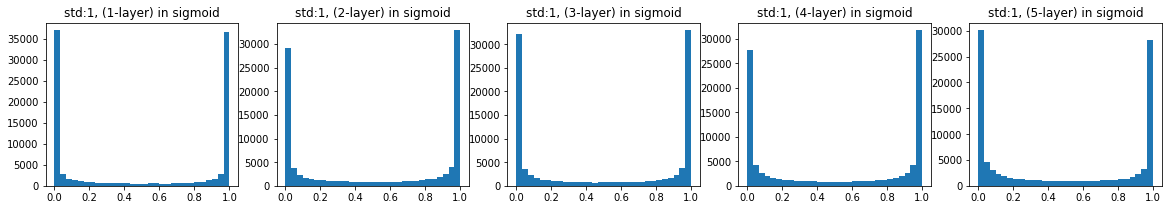

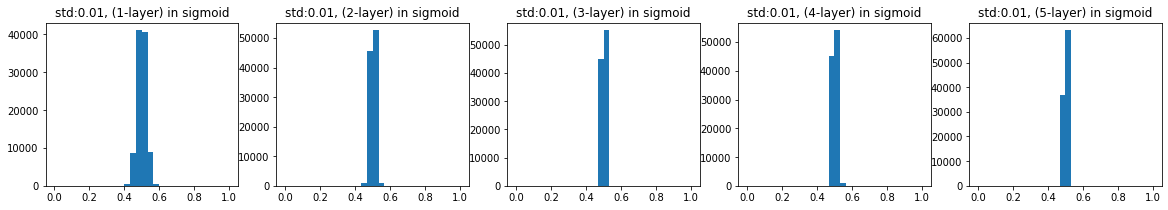

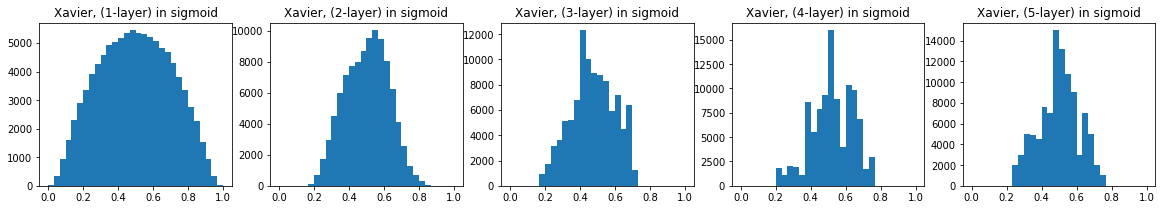

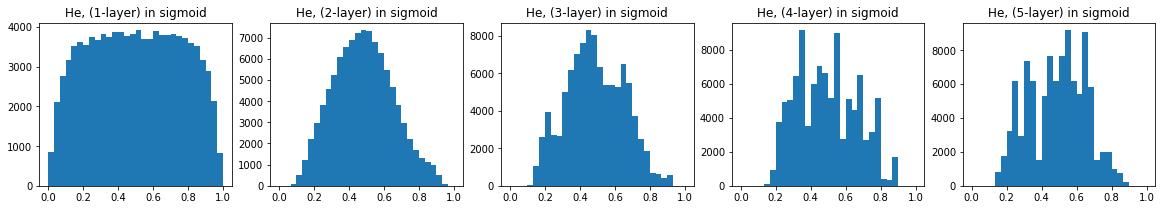

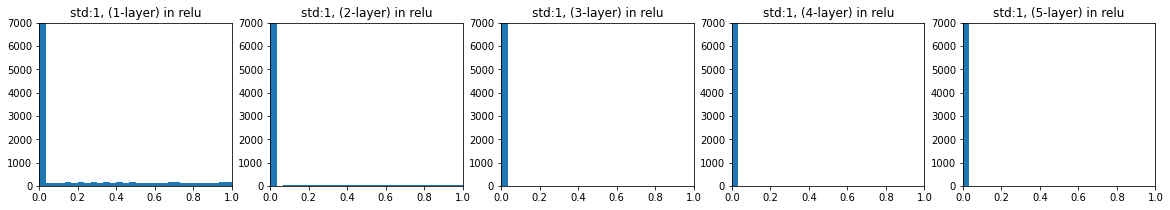

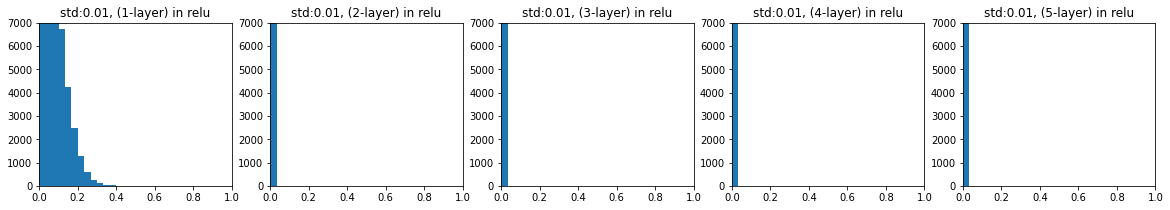

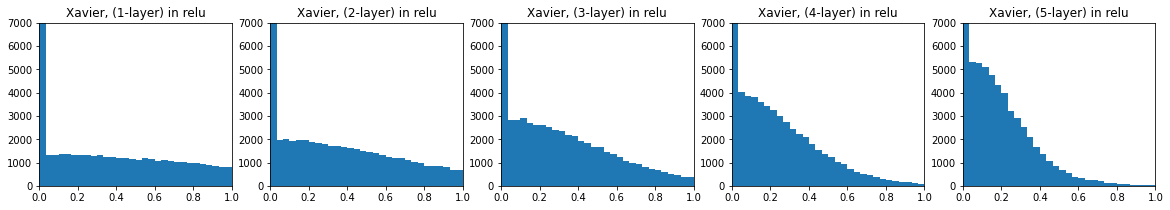

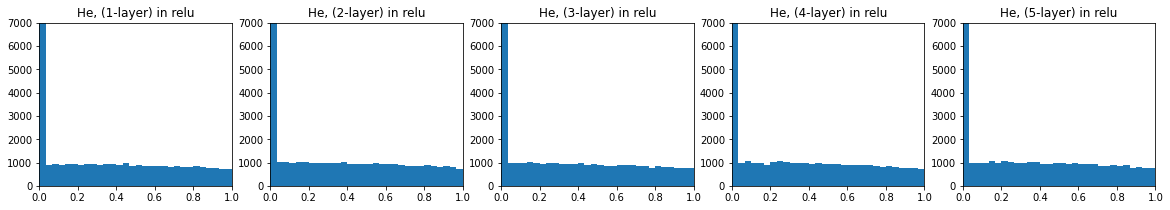

In [33]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
  return 1 / (np.exp(-x) + 1)

def relu(x):
  mask = (x <= 0)
  out = x.copy()
  out[mask] = 0
  return out

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

stds = {}
stds['std:1'] = 1
stds['std:0.01'] = 0.01
stds['Xavier'] = 1 / np.sqrt(100)
stds['He'] = 1 / np.sqrt(50)

# Sigmoid 활성화 함수에 대해서 초기화를 시험해본다.
for name, std in stds.items():
  x = np.random.randn(1000, 100)
  activations = {}
  for i in range(hidden_layer_size):
    if i != 0:
      x = activations[i-1]

    W = np.random.randn(node_num, node_num) * std
    a = np.dot(x, W)
    z = sigmoid(a)
    activations[i] = z
  
  plt.figure(figsize = (20,3))
  for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(name + ", (" +str(i+1) + "-layer) in sigmoid")
    plt.hist(a.flatten(), 30, range=(0,1))
  plt.show()


# Relu 활성화 함수에 대해서 초기화를 시험해본다.
for name, std in stds.items():
  x = np.random.randn(1000, 100)
  activations = {}
  for i in range(hidden_layer_size):
    if i != 0:
      x = activations[i-1]

    W = np.random.randn(node_num, node_num) * std
    a = np.dot(x, W)
    z = relu(a)
    activations[i] = z
  
  plt.figure(figsize = (20,3))
  for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(name + ", (" +str(i+1) + "-layer) in relu")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, 7000])
  plt.show()

